In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [132]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path,sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [134]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **1. Analyzing the data Set**

In [135]:
# cheak null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

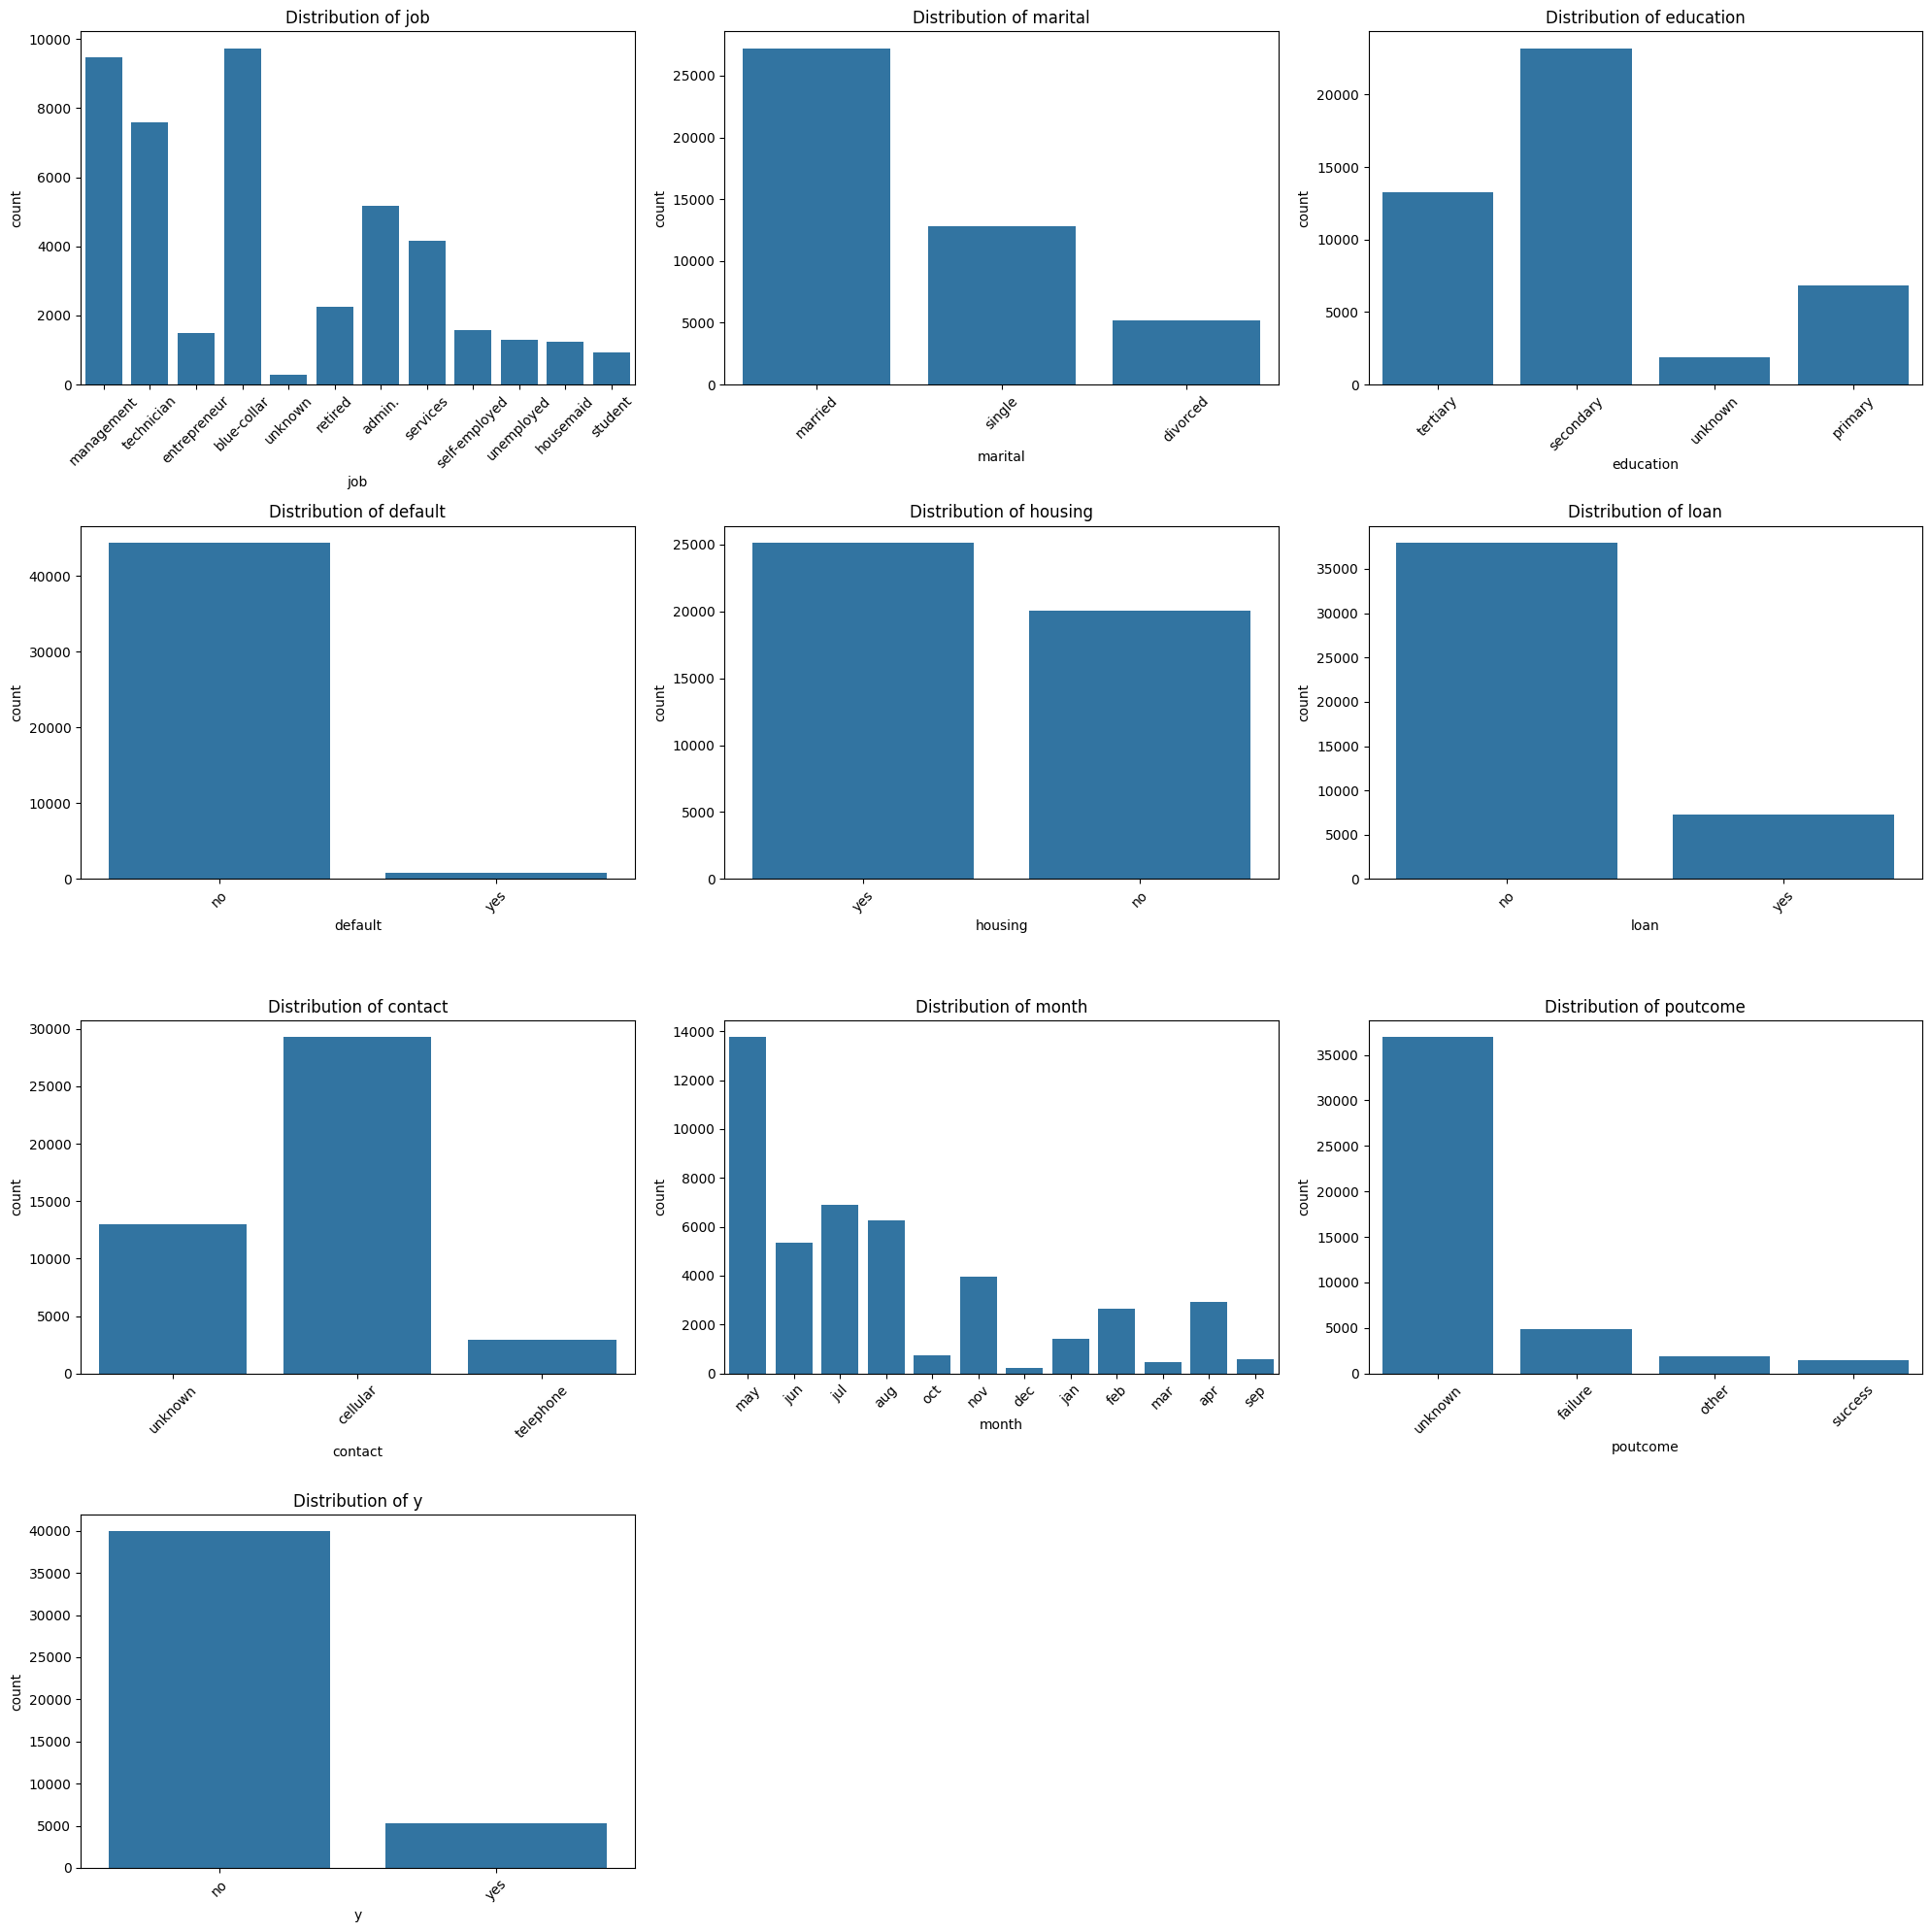

In [136]:
categorical_columns = df.select_dtypes(include="object").columns

#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  

plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1
for column in categorical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.countplot(x=column, data=df)
    plt.xlabel(column)  
    plt.title(f'Distribution of {column}') 
    plt.xticks(rotation=45)  
    plt_number += 1

plt.tight_layout()

plt.show()


**Findings**
 - we can find the categories of the categorical fetures and the count of it using this
 - data we can understand the type of clients and the backround of them 
 - outcome of the previous marketing campaign
 - number the client subscribed a term deposit



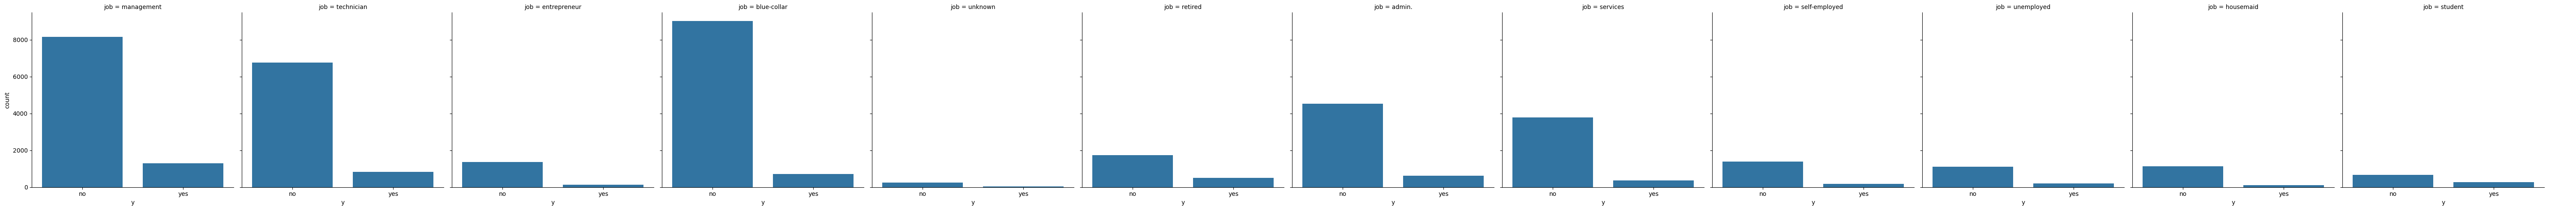

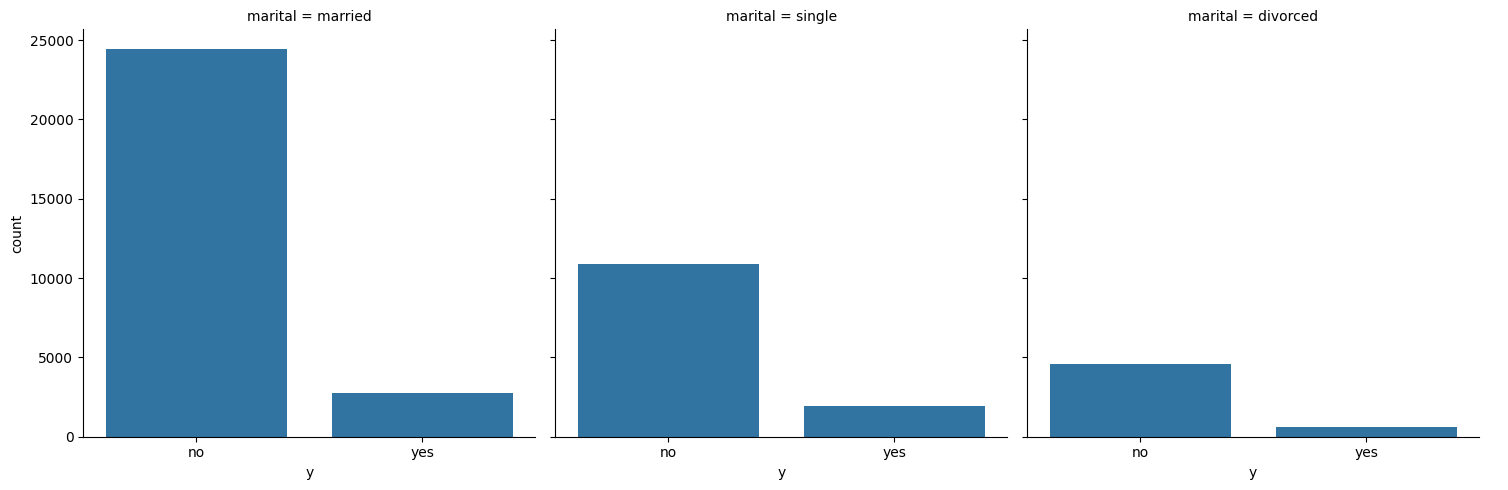

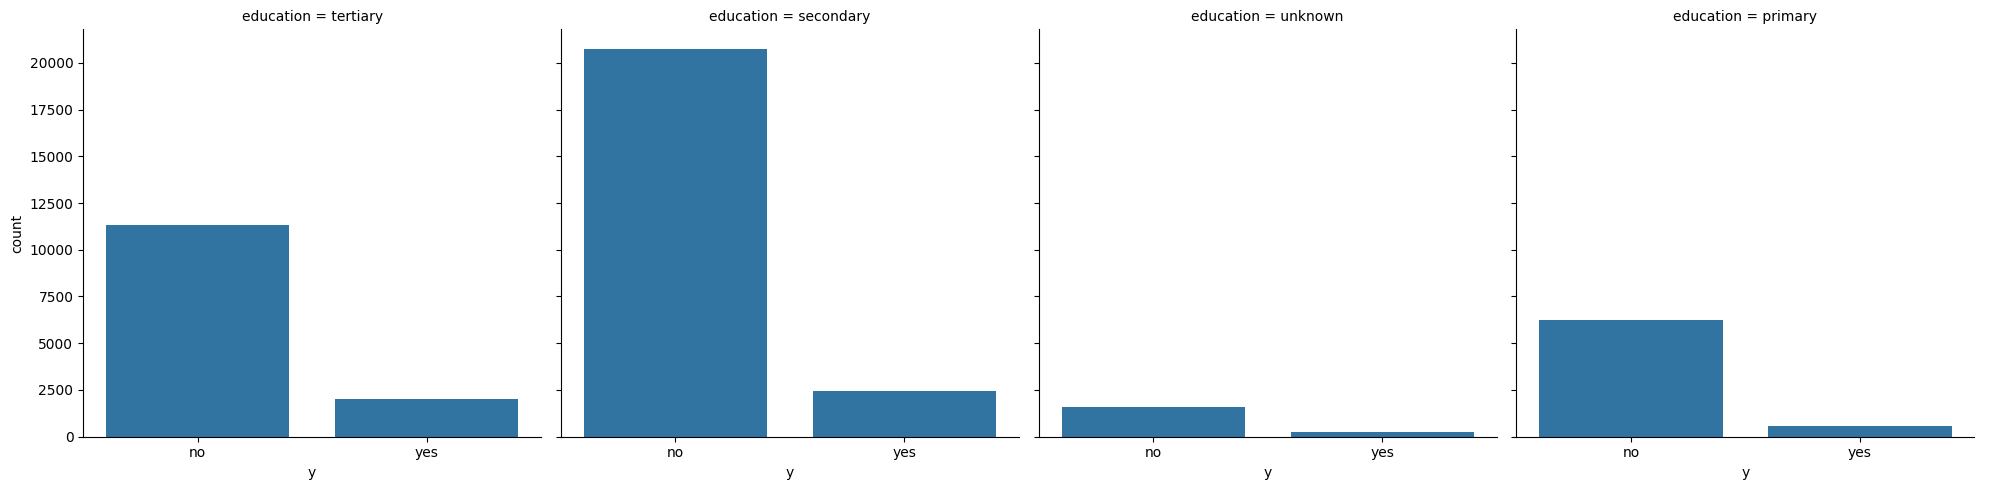

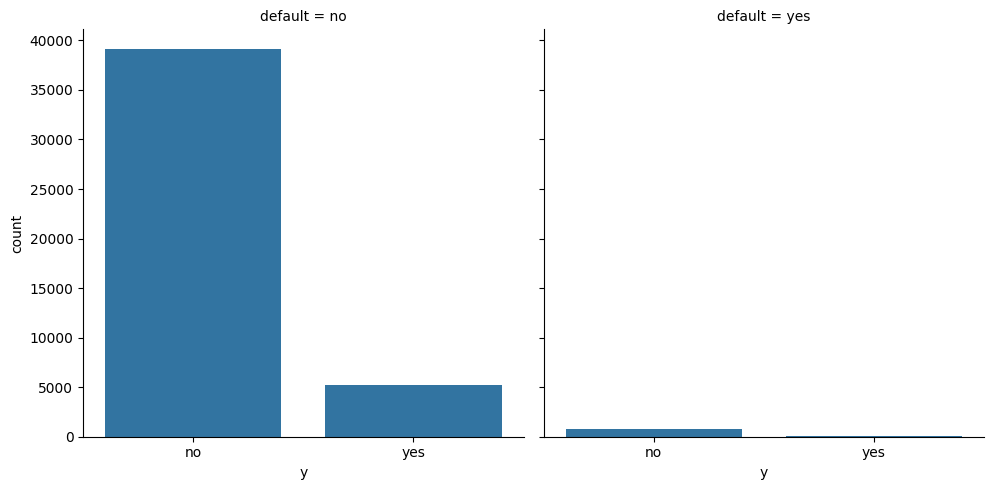

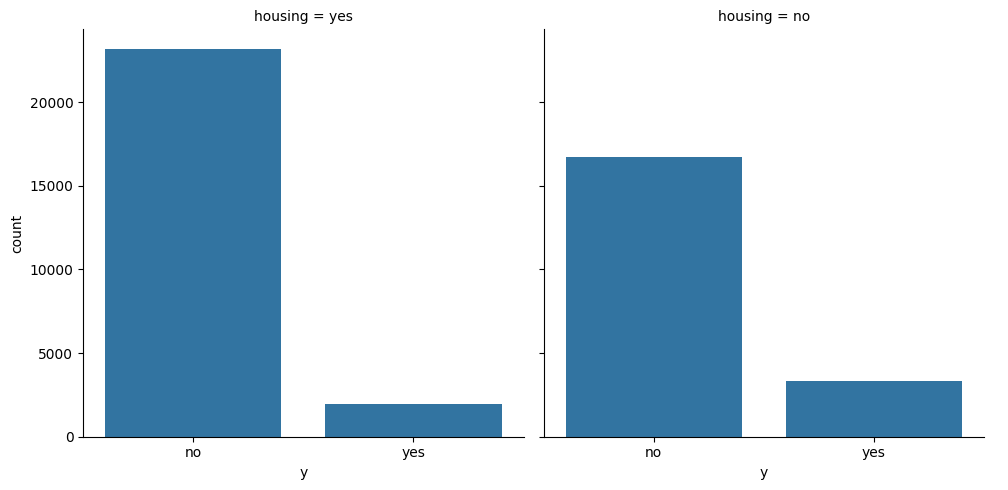

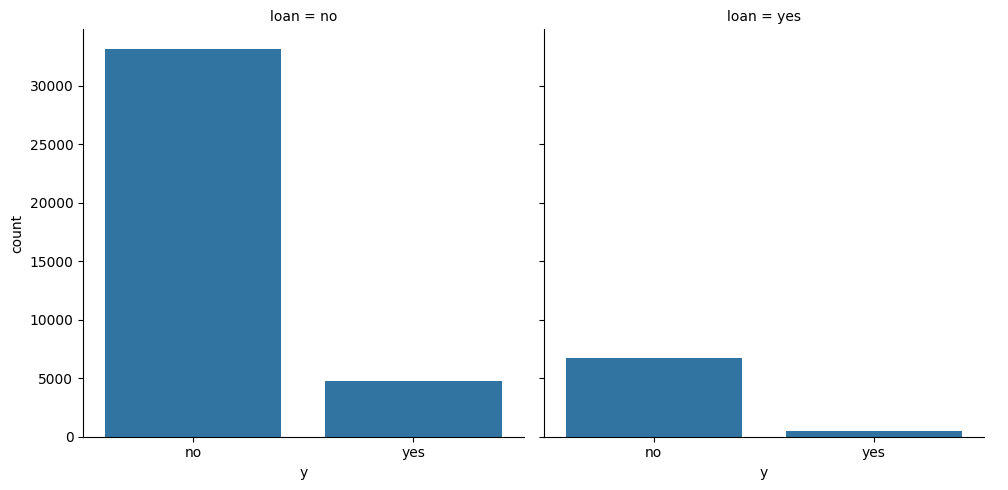

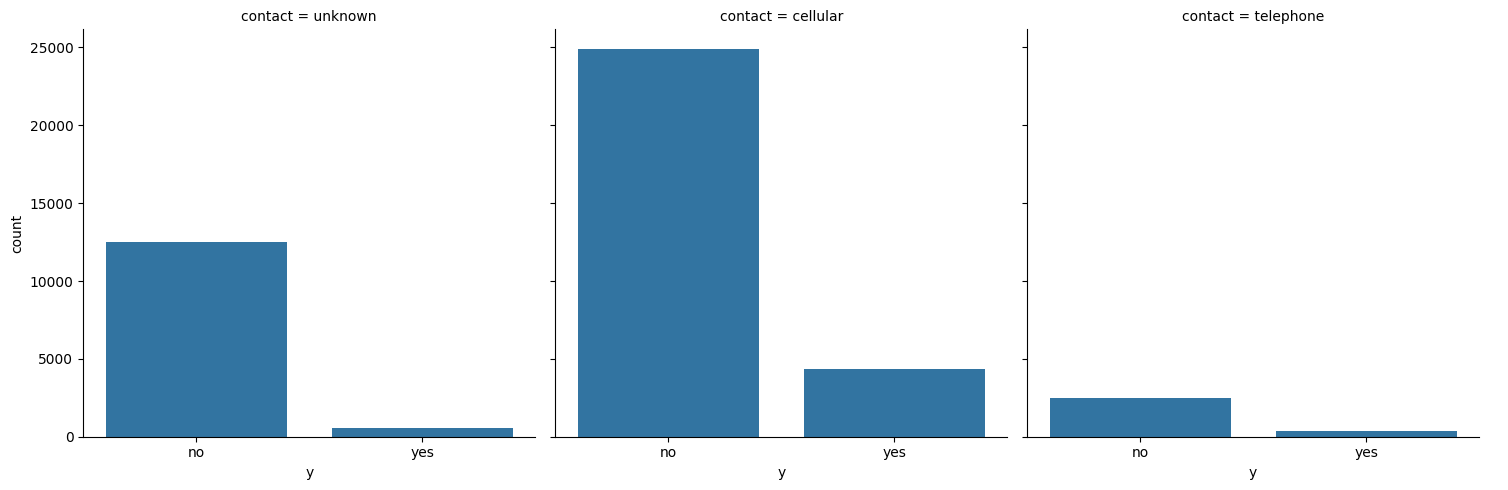

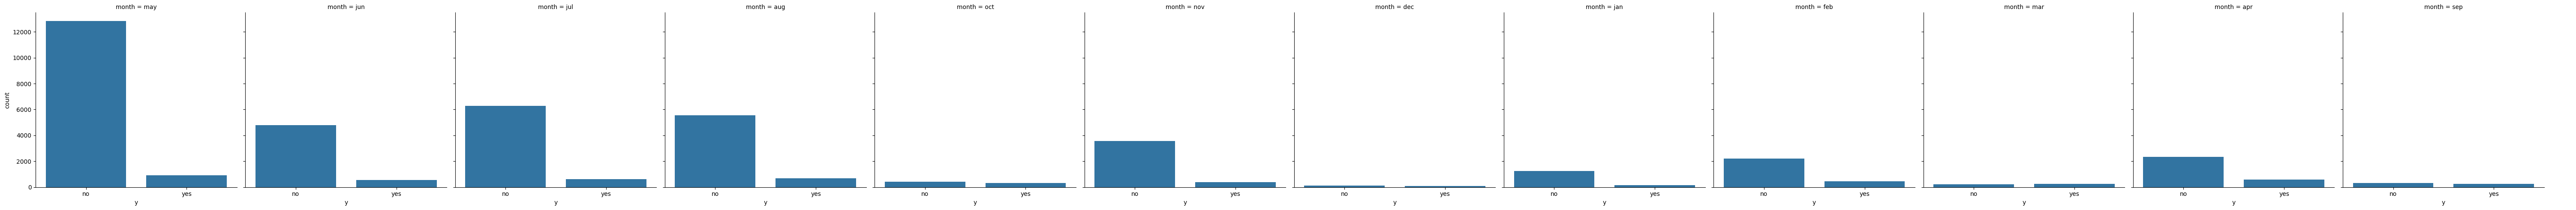

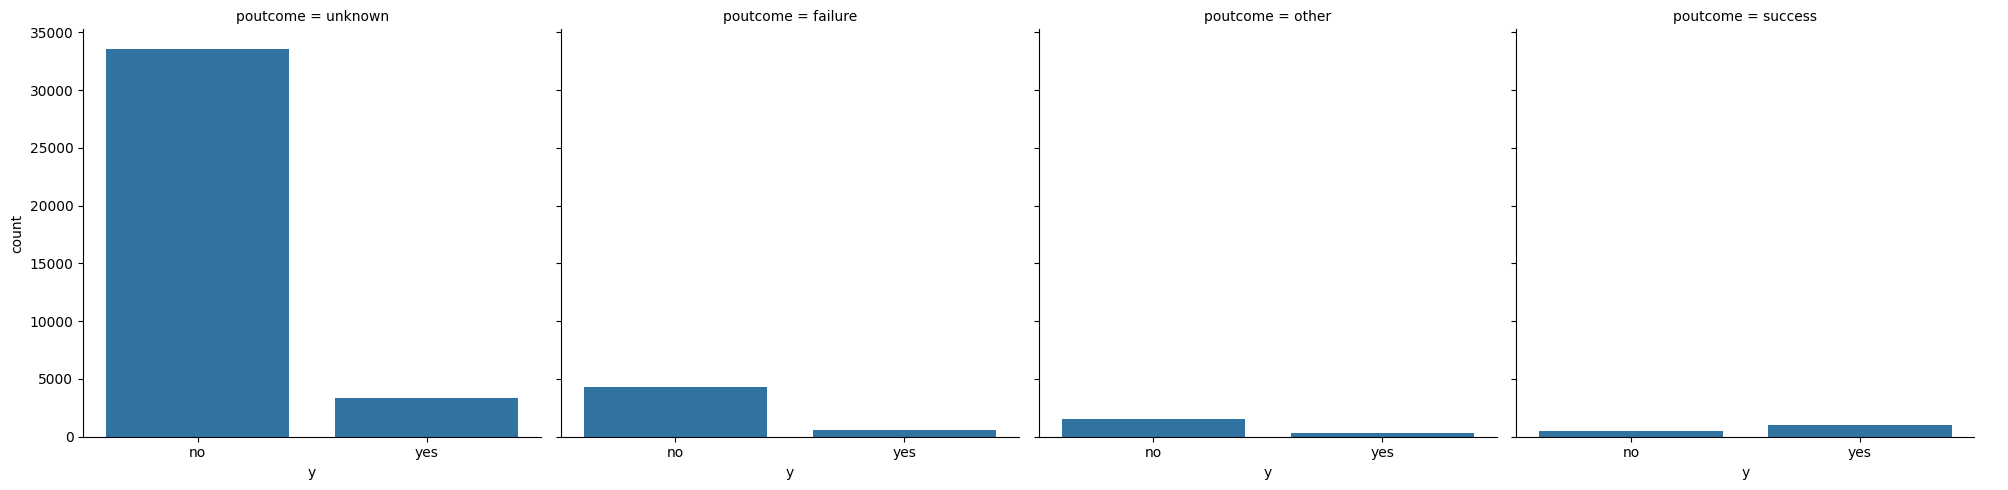

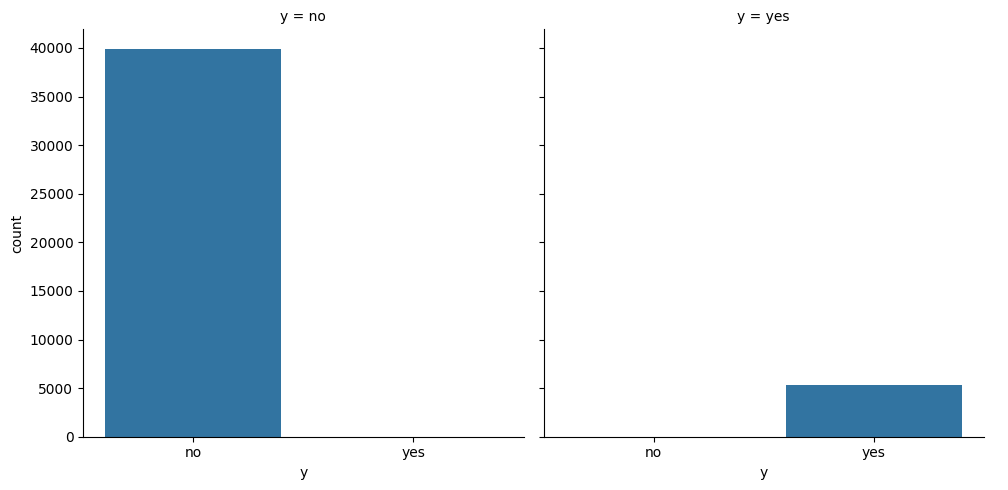

In [137]:
# categorical features and the target
for col in categorical_columns:
    sns.catplot(x="y",col = col,kind= "count", data = df)
plt.show()


**Findings**
- according to the client type how many of them subscribe this
- outcome of the pre campaign
- the month clients show there highest interest in deposit

In [138]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
balance
day
duration
campaign
pdays
previous


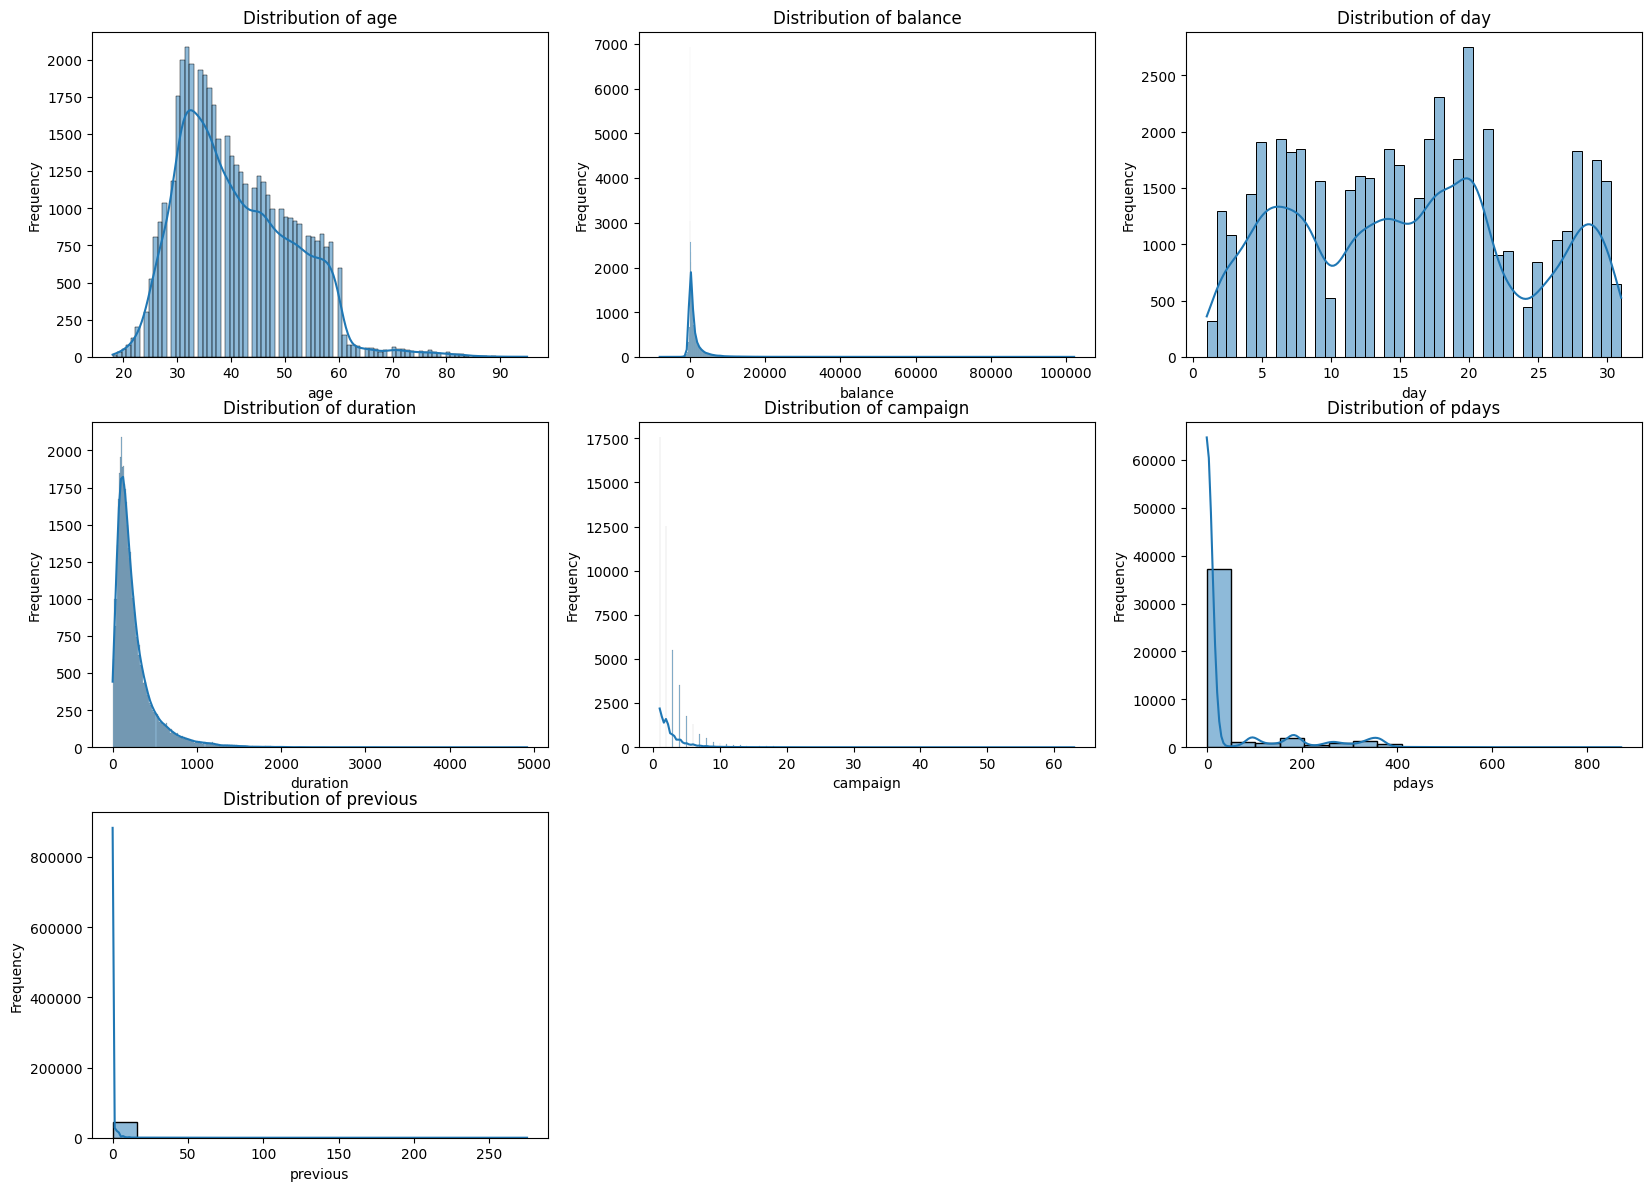

In [139]:

plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.histplot(df[col], kde=True)  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1


plt.show()

**Findings**
- in some distribtion thy seems to have outliers

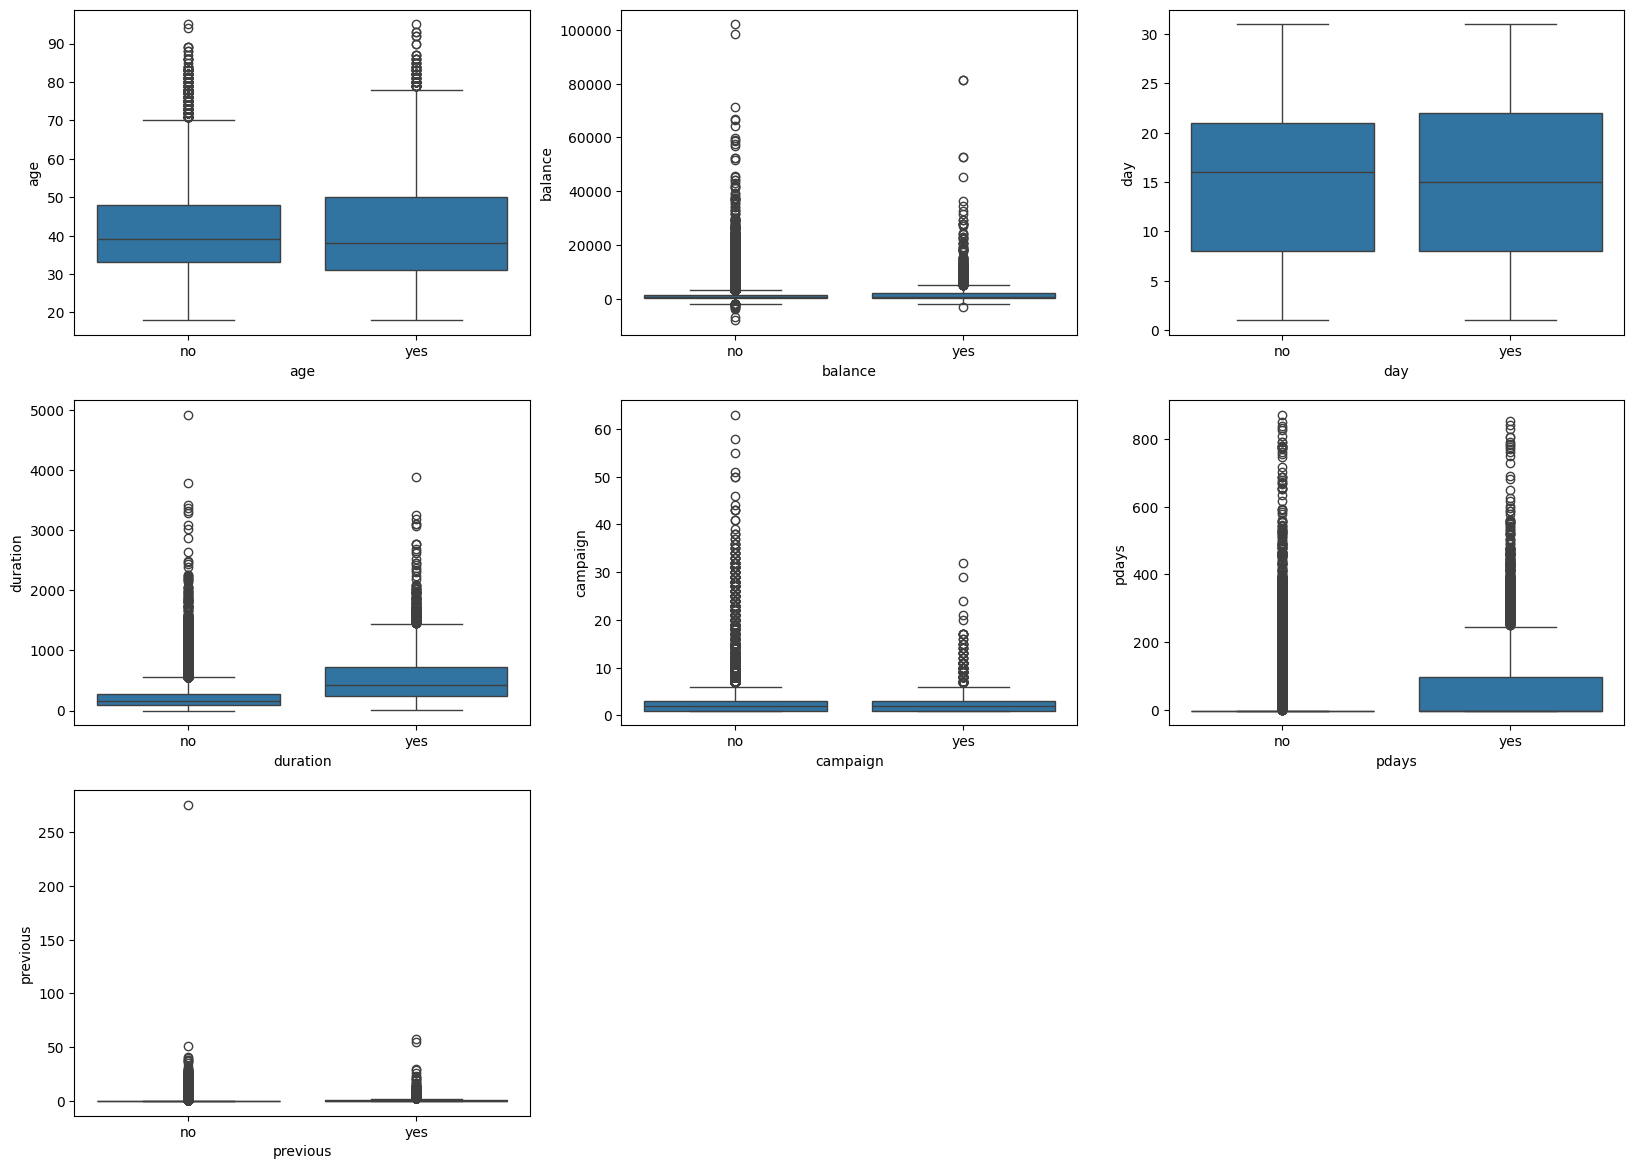

In [140]:
#finding the outliers of the numerical values
plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.boxplot(x= df["y"], y = df[col])  
    plt.xlabel(col)  
    plt_number += 1


plt.show()

**Findings**
-  which range of the clients doing the deposits  in there features like age, balance and etc

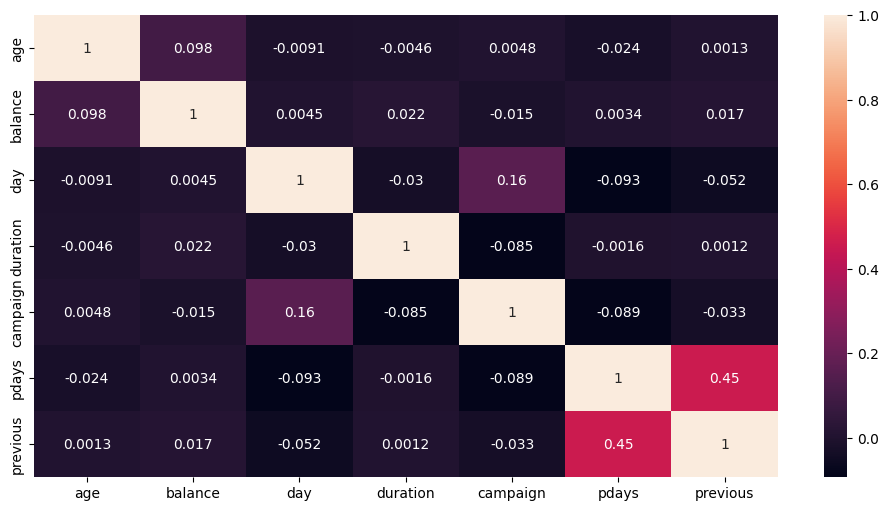

In [141]:
# Correlation between numerical fetures
cor = df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor, annot= True)

plt.show()


**Findings**
- From the above heatmap we can find there is not much of correlation between the features

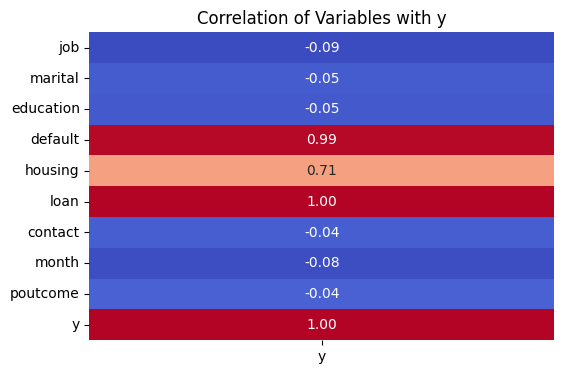

In [142]:
# Choose the target variable (e.g., 'Category1')
target_variable = 'y'

# Step 1: Count occurrences for target and other variables
counts = df.select_dtypes(include=['object']).apply(lambda col: col.value_counts()).fillna(0)

# Step 2: Compute correlations with the target variable
correlations_with_target = counts.corr()[target_variable]

# Step 3: Create a heatmap for the target variable
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlations_with_target.to_frame(),  # Convert Series to DataFrame for heatmap
    annot=True,
    cmap='coolwarm',
    cbar=False,
    fmt=".2f"
)
plt.title(f'Correlation of Variables with {target_variable}')
plt.show()


## **2. Feature Engneering**

In [143]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [144]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [145]:
df2.drop(['default'], axis= 1, inplace= True)

**Explanation**
- More than 90 percentage of the default value so that's why e removing it


In [146]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

**Explanation**
- in here -1 don't have any meanning  almost every thing is -1 

In [147]:
df2.drop(['pdays'], axis= 1, inplace= True)

In [148]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,0,unknown,no


In [151]:
df_encoded = pd.get_dummies(df2, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])



In [153]:
binary_col = ['housing','loan','y']
for col in binary_col:
    df_encoded[col] = df_encoded[col].apply(lambda x : 1 if x == 'yes' else 0)
    

In [154]:
df_encoded

,age,balance,housing,loan,day,duration,campaign,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,0,0,5,261,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,0,0,5,151,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,0,0,5,76,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,0,0,5,92,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
4,33,1,0,0,5,198,1,0,0,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,17,977,3,0,1,False,...,False,False,False,True,False,False,False,False,False,True
45207,71,1729,0,0,17,456,2,0,1,False,...,False,False,False,True,False,False,False,False,False,True
45208,72,5715,0,0,17,1127,5,3,1,False,...,False,False,False,True,False,False,False,False,True,False
45209,57,668,0,0,17,508,4,0,0,False,...,False,False,False,True,False,False,False,False,False,True
